## 코로나 : 시각화를 통한 인사이트 도출

**참고 팀**: https://visualisingkorea.com/

### 1. 준비.

In [2]:
# 필요한 라이브러리를 가져온다.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler 
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

In [3]:
# Pandas 데이터 프레임에서 float을 소수점 4자리 까지 출력해 준다.
pd.set_option("precision",4)

In [4]:
# 성가신 경고를 꺼준다.
import warnings  
warnings.filterwarnings('ignore')

In [5]:
# 환자정보 데이터를 불러온다.
df1 = pd.read_csv('C:/study_data/bigdata/별첨 2_DACON_코로나 데이터 분석_업데이트 2/data/PatientInfo.csv')

In [6]:
df1.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [7]:
# 컬럼의 자료형을 살펴본다.
df1.info()
# 명목형 컬럼이 많다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

### 2. 기초적인 탐색.

In [8]:
# 결측치의 총 카운트.
# df1.isnull().sum() # 컬럼별로 결측치를 집결할 수 있다.
df1.isnull().sum().sum()

27910

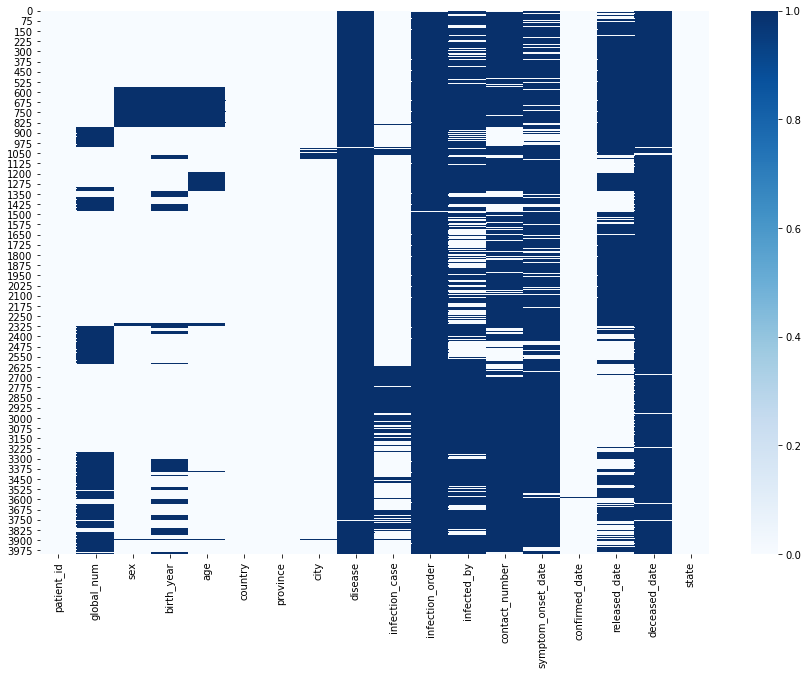

In [9]:
# 결측치를 시각화 해본다.
plt.figure(figsize = (15,10))                                       # figsize=(가로, 세로) 크기.
sns.heatmap(df1.isnull(), cmap='Blues', cbar=True)
# hitmap = 데이터의 값에 따라서 값의 분포를 나타내줘서 표현할 수 있다. cmap = 그래프의 표현 방법 , cbar = 값의 농도에 따라 달라지는 색을 표시해주는 바
plt.show()

In [10]:
# 중복된 환자 ID는 없어 보인다.
print("데이터 행의 수 = {}".format(df1.shape[0]))                  # 데이터 행의 수 = 4004
print("고유한 환자 ID 수 = {}".format(df1.patient_id.nunique()))   # 고유한 환자 ID 수 = 4004

데이터 행의 수 = 4004
고유한 환자 ID 수 = 4004


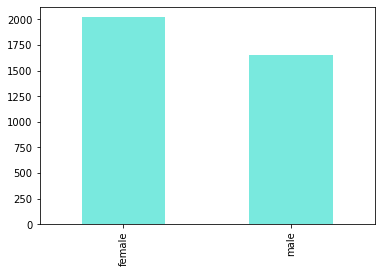

In [11]:
# 명목형 변수인 Sex를 시각화 해본다.
sex_counts = df1.sex.value_counts()              
sex_counts = sex_counts.sort_values(ascending=False)
sex_counts.plot.bar(color='turquoise', alpha=0.7)
plt.show()

In [15]:
# Age 변수의 유형 출력.
df1.age.unique()

array(['50', '30', '20', '60', '80', '70', '40', '10', '90', '0', nan,
       '100'], dtype=object)

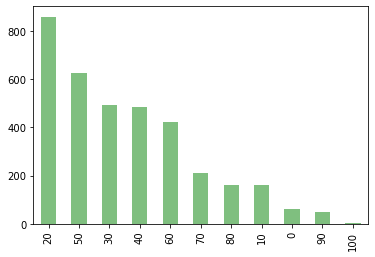

In [13]:
# 명목형 변수인 Age를 시각화 해본다.
df1.age = df1.age.str.replace('s','',regex=True)                      # 's' 제거.
age_counts = df1.age.value_counts()                                   # 도수표.
age_counts = age_counts.sort_values(ascending=False)
age_counts.plot.bar(color='green', alpha=0.5)
plt.show()

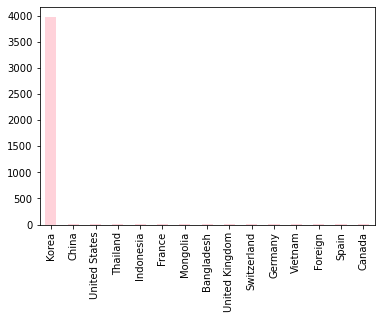

In [14]:
# 명목형 변수인 Country를 가지고 국적별로 시각화 해본다.
country_counts = df1.country.value_counts()                 
country_counts = country_counts.sort_values(ascending=False)
country_counts.plot.bar(color='pink', alpha = 0.7)
plt.show()

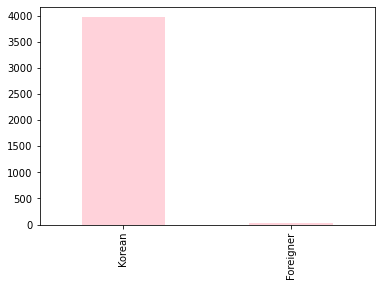

In [16]:
# 명목형 변수인 Country를 가지고 내국인 여부를 시각화 해본다.
country_counts = (df1.country == "Korea").value_counts()
country_counts = country_counts.sort_values(ascending=False)
country_counts.index = ["Korean", "Foreigner"]
# country로 새로운 시리즈를 만들었기 때문에 index가 True False(value_counts)로 만들어졌기 때문에 rename해준다.
country_counts.plot.bar(color= "pink",alpha=0.7)
plt.show()

In [17]:
# 기저질환 (disease)는 결측치 아닌 정상값의 수가 절대적으로 부족해서 분석하기 어려움.
df1.disease.count()

18

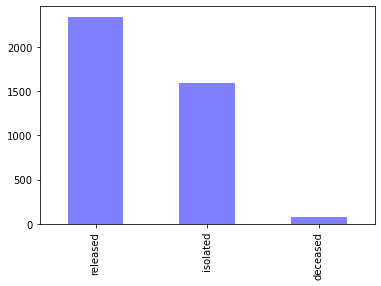

In [18]:
# 명목형 변수인 State를 시각화 해본다.
state_counts = df1.state.value_counts()              
state_counts = state_counts.sort_values(ascending=False)
state_counts.plot.bar(color='blue', alpha=0.5)
plt.show()

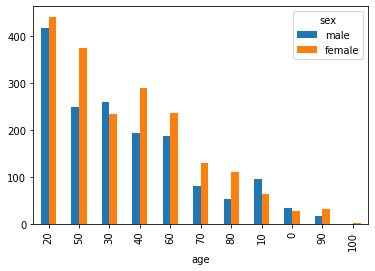

In [19]:
# 명목형 변수인 Age와 Sex를 조합하여 시각화 해본다.
ct = pd.crosstab(df1.age, df1.sex)
ct['total'] = ct.male + ct.female                      # total 컬럼.
ct.sort_values(by=['total'], ascending=False)[['male','female']].plot.bar()   # total로 소팅. total은 시각화에서는 제외!
plt.show()

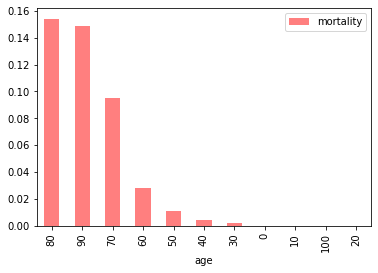

In [21]:
# Age별 사망비율.
ct = pd.crosstab(df1.age, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)  # 사망의 비율을 알기 위해 
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='red', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

In [ ]:
# Age와 사망여부 독립성 검정. (아직 다루지 않음)
stat, p_val, degFree, expected = st.chi2_contingency(ct[['alive','deceased']])    # 통계량, p-값, 자유도, 기대도수.
print("p_value : {}".format(np.round(p_val,3)))                                   # 독립이 아님!

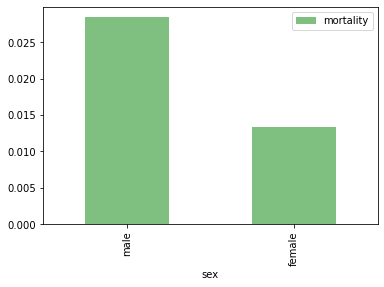

In [24]:
# Sex별 사망비율.
ct = pd.crosstab(df1.sex, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

In [ ]:
# Sex와 사망여부 독립성 검정. ( 아직 다루지 않음 )
stat, p_val, degFree, expected = st.chi2_contingency(ct[['alive','deceased']])    # 통계량, p-값, 자유도, 기대도수.
print("p_value : {}".format(np.round(p_val,3)))                                   # 독립이 아님!

### 3. 감염 경로 유형 (Infection Case)

In [ ]:
# 감염 경로의 유형 출력.
print(df1.infection_case.unique())

In [ ]:
# 감염 경로의 가지수 출력.
print(df1.infection_case.nunique())

In [ ]:
# 감염 경로별 환자수 집계하여 시각화 한다.
res = df1.groupby(['infection_case'])['patient_id'].count()        # 결측치가 아닌 patient_id의 수 = 환자의 수.
res = res.reset_index()                                           # Series => DataFrame. 이전의 Index가 이제는 새로운 컬럼!
res.rename(columns = {'infection_case':'infection case', 'patient_id': 'count'}, inplace = True)     # 'patient_id' 컬럼명을 'count'로 변경.
res = res.sort_values(by = 'count', ascending = False)            # 데이터 프레임 내림 차순으로 소팅.

plt.figure(figsize = (12,6))                                       # figsize=(가로, 세로) 크기.
sns.barplot(y = 'infection case', x= 'count', data = res)
plt.title('Number of Patients per Infection Case')
plt.show()

In [ ]:
# 헬퍼 함수 정의.
def my_conversion_func(x):
    if not pd.isnull(x):
        if x in my_dict.keys():
            return my_dict[x]
        else:
            return "Group"
    else:
        return "Unknown"

In [ ]:
# 다음과 같이 유형의 label을 바꾸어서 다시 집계 및 시각화 해본다.
# 'contact with patient' => 'Individual'     개인접촉
# 'etc'  or NaN         => 'Unknown'         모름
# 'overseas inflow'     => 'Overseas'        해외
#  나머지               => 'Group'            집단

my_dict = {'contact with patient':'Individual', 'etc':'Unknown', 'overseas inflow': 'Overseas'}
res = df1.infection_case.apply(lambda x: my_dict[x] if x in my_dict.keys() else 'Group' if not pd.isnull(x) else 'Unknown')  # 변환! Pythonic!
#res = df1.infection_case.apply(my_conversion_func)    # 또다른 방법.
df1['infection_cause'] = res  # 변환을 df1에도 적용.

# 다시 집계하여 시각화 해본다.
res = res.value_counts().sort_values(ascending=False)
res = res.reset_index()                                                               # Series => DataFrame. 이전의 Index가 이제는 새로운 컬럼!
res.rename(columns={'index':'infection_cause','infection_case':'count'},inplace=True)

plt.figure(figsize = (12,6))                                       # figsize=(가로, 세로) 크기.
sns.barplot(y = 'infection_cause', x= 'count', data = res, alpha=0.8)
plt.title('Number of Patients per Infection Cause')
plt.show()

**결론**: 유입 경로를 4가지로 요약해 봄.

### 4. 유동성 (Mobility Level)

In [ ]:
# 새롭게 유입경로 데이터를 불러온다.
df2 = pd.read_csv(r'.\data\PatientRoute.csv')

In [ ]:
df2.head()

In [ ]:
# 결측치의 총 카운트.
df2.isnull().sum().sum()

In [ ]:
# 결측치를 시각화 해본다.
plt.figure(figsize = (10,10))                                       # figsize=(가로, 세로) 크기.
sns.heatmap(df2.isnull(), cmap='Blues', cbar=False)
plt.show()

In [ ]:
# 중복된 환자 ID가 많아 보인다.
print("데이터 행의 수 = {}".format(df2.shape[0]))
print("고유한 환자 ID 수 = {}".format(df2.patient_id.nunique()))

In [ ]:
# 이동 경로의 유형 출력.
print(format(df2.type.unique()))

In [ ]:
# 이동 경로의 가지수 출력.
print(format(df2.type.nunique()))

In [ ]:
# 이동 경로의 유형을 카테고리로 표현해 본다.
leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon',
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke']
travel = ['airport', 'lodging']
essential_edu = ['primary_school', 'school', 'university']
non_essential_edu = ['academy']
exercise = ['gym', 'mountain', 'park']
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office']
non_essential_admin = ['police_office', 'bank', 'real_estate_agency']
necessity = ['store', 'public_transportation', 'gas_station']
medical = ['hospital', 'pharmacy']
church = ['church']
etc = ['etc']

In [ ]:
# "필수적" 카테고리는 다음과 같이 정의한다.
essential = essential_edu + essential_admin + necessity + medical 
len(essential)

In [ ]:
# 필수/부수적 여부 변수 'is_essential' 파생변수로 추가.
def isessential(x):     
    if x in essential: 
        res = True
    else:
        res = False 
    return res
df2['is_essential'] = df2['type'].apply(lambda x: isessential(x)) 

# 데이터 프레임 간추리기.
df2 = df2[['patient_id', 'type', 'is_essential']]
df2.head()

In [ ]:
# 동일 환자의 경로 유형을 집계한다 (sum).
# 결측치는 0으로 채운다.
df2['route_value'] = 1       # 1 로 채워진 컬럼을 추가해서 집계의 목적으로 사용한다.
df3 = pd.pivot_table(data=df2, index = 'patient_id', columns = 'is_essential', values= 'route_value', aggfunc='sum', fill_value=0)
df3.head()

In [ ]:
# Index로 있는 patient_id를 컬럼으로 빼내고 정리한다.
df3.columns.name=None
df3 = df3.reset_index()
df3 = df3.rename(columns={False:'non_essential',True:'essential'})
df3.head()

In [ ]:
# df1 (PatientInfo)와 df3 (PatientRoute 요약)을 Inner Join 해서 가로 방향으로 붙여서 df_joined를 만든다.
df_joined = df1.merge(df3, left_on = 'patient_id', right_on = 'patient_id' , how='inner')

In [ ]:
# 살펴본다.
df_joined.head()

In [ ]:
# 모든 환자에 대해서 동선이 명확한 것이 아니기 때문에 Join 후 대폭 행의 수가 줄어 들었다.
print("Number of Rows Before = {}".format(len(df1)))
print("Number of Rows After = {}".format(len(df_joined)))

### 5. 접촉 빈도 (Number of Contacts)

In [ ]:
# contact_number가 결측치가 아니고 '-'가 아닌 행들만 가져온다. '-'는 오류로 유입된 값인듯.
res = df_joined.contact_number
df_joined = df_joined[~res.isnull() & (res != '-')]

In [ ]:
# contact_number의 자료형을 integer로 변경하고 이상값은 제거한다.
df_joined['contact_number'] = df_joined.contact_number.astype(int)
df_joined = df_joined[df_joined.contact_number < 10000]

In [ ]:
# 최대 첩촉빈도.
df_joined.contact_number.max()

In [ ]:
# 최대 첩촉빈도에 해당하는 환자.
df_joined[df_joined.contact_number == df_joined.contact_number.max()]

In [ ]:
# 필요한 컬럼만 가져와서 정리한다.
df4 = df_joined[['patient_id', 'contact_number', 'essential','non_essential','infection_cause']]
df4.head()

In [ ]:
# 접촉 빈도를 히스토그램으로 시각화 한다.
sns.distplot(df4.contact_number,bins=50)
plt.show()

### 6. 군집화 (Clustering)

In [ ]:
# Infection_cause를 가변수 처리한다.
df4 = df4.join(pd.get_dummies(df4.infection_cause, prefix='infection',drop_first=False))

In [ ]:
df4

In [ ]:
df_final = df4[ ['essential', 'non_essential', 'contact_number',
          'infection_Group', 'infection_Individual', 'infection_Overseas', 'infection_Unknown']]

In [ ]:
df_final

In [ ]:
# 컬럼의 표준화를 실행한다.
X = df_final.values                        
my_scaler = StandardScaler()
X = my_scaler.fit_transform(X)

In [ ]:
# 군집의 수 = 4로 정하고 군집화를 실행한다.  <= 군집의 수 최적화가 선행되어야 한다! (부록 참고)
my_km = KMeans(n_clusters = 4, random_state = 123)
my_km.fit(X)

my_centroids = my_km.cluster_centers_               # 개개 군집의 중심점.
my_cluster_labels = my_km.labels_                   # 군집 label.

In [ ]:
# 클러스터 중심을 출력하고 해석한다.
pd.DataFrame(my_centroids,columns = df_final.columns)

**해석:** <br>
- Label 0 (red): Social minimalists.
- Label 1 (blue): Hyper-mobile and hyper-social.
- Label 2 (green): Overseas non-essentialists. 
- Label 3 (yellow): Moderate unknwons.

In [ ]:
# PCA 차원축소 (2차원).
my_pca = PCA(n_components = 2)
transformed_comps = my_pca.fit_transform(X)         # Transformed 된 좌표.
df_transformed_comps = pd.DataFrame(data = transformed_comps, columns = ['PC1', 'PC2'])
df_transformed_comps=df_transformed_comps.join(pd.Series(my_cluster_labels, name='cluster_label'))
df_transformed_comps

In [ ]:
# 산점도 시각화.
my_colors = {0:'red',1:'blue',2:'green',3:'yellow'}    # 군집 label => Color.
my_names = {0: 'Social minimalists.', 1: 'Hyper-mobile and hyper-social.' , 2: 'Overseas non-essentialists.', 3: 'Moderate unknwons.'} # 군집 label => 명칭.

plt.figure(figsize = (6,6))
for a_cluster_n, df_small in df_transformed_comps.groupby('cluster_label'):
    plt.scatter('PC1', 'PC2', data = df_small, c = my_colors[a_cluster_n], label = my_names[a_cluster_n], s = 10, alpha=0.6 )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters')
plt.legend(loc=4)
plt.show()

### 부록: 군집의 수 최적화

In [ ]:
# 군집의 수를 키워가며 Sum of Squares Within을 계산한다.
ssw = []
cluster_ns = range(2,16)
for n in cluster_ns:
    my_cluster = KMeans(n)
    my_cluster.fit(X)
    ssw += [my_cluster.inertia_]         # SSW를 모아둔다.

plt.figure(figsize = (6,6))
plt.plot(cluster_ns, ssw)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Within')
plt.show()

**결론**: 군집의 수가 5 이상일 때 SSW의 감소 속도가 둔화된다. => 군집의 적정 수 = 4.